# Data attributes

Attribute 1:  (qualitative)
	       Status of existing checking account
               A11 :      ... <    0 DM
	       A12 : 0 <= ... <  200 DM
	       A13 :      ... >= 200 DM /
		     salary assignments for at least 1 year
               A14 : no checking account

Attribute 2:  (numerical)
	      Duration in month

Attribute 3:  (qualitative)
	      Credit history
	      A30 : no credits taken/
		    all credits paid back duly
              A31 : all credits at this bank paid back duly
	      A32 : existing credits paid back duly till now
              A33 : delay in paying off in the past
	      A34 : critical account/
		    other credits existing (not at this bank)

Attribute 4:  (qualitative)
	      Purpose
	      A40 : car (new)
	      A41 : car (used)
	      A42 : furniture/equipment
	      A43 : radio/television
	      A44 : domestic appliances
	      A45 : repairs
	      A46 : education
	      A47 : (vacation - does not exist?)
	      A48 : retraining
	      A49 : business
	      A410 : others

Attribute 5:  (numerical)
	      Credit amount

Attibute 6:  (qualitative)
	      Savings account/bonds
	      A61 :          ... <  100 DM
	      A62 :   100 <= ... <  500 DM
	      A63 :   500 <= ... < 1000 DM
	      A64 :          .. >= 1000 DM
              A65 :   unknown/ no savings account

Attribute 7:  (qualitative)
	      Present employment since
	      A71 : unemployed
	      A72 :       ... < 1 year
	      A73 : 1  <= ... < 4 years  
	      A74 : 4  <= ... < 7 years
	      A75 :       .. >= 7 years

Attribute 8:  (numerical)
	      Installment rate in percentage of disposable income

Attribute 9:  (qualitative)
	      Personal status and sex
	      A91 : male   : divorced/separated
	      A92 : female : divorced/separated/married
              A93 : male   : single
	      A94 : male   : married/widowed
	      A95 : female : single

Attribute 10: (qualitative)
	      Other debtors / guarantors
	      A101 : none
	      A102 : co-applicant
	      A103 : guarantor

Attribute 11: (numerical)
	      Present residence since

Attribute 12: (qualitative)
	      Property
	      A121 : real estate
	      A122 : if not A121 : building society savings agreement/
				   life insurance
              A123 : if not A121/A122 : car or other, not in attribute 6
	      A124 : unknown / no property

Attribute 13: (numerical)
	      Age in years

Attribute 14: (qualitative)
	      Other installment plans 
	      A141 : bank
	      A142 : stores
	      A143 : none

Attribute 15: (qualitative)
	      Housing
	      A151 : rent
	      A152 : own
	      A153 : for free

Attribute 16: (numerical)
              Number of existing credits at this bank

Attribute 17: (qualitative)
	      Job
	      A171 : unemployed/ unskilled  - non-resident
	      A172 : unskilled - resident
	      A173 : skilled employee / official
	      A174 : management/ self-employed/
		     highly qualified employee/ officer

Attribute 18: (numerical)
	      Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
	      Telephone
	      A191 : none
	      A192 : yes, registered under the customers name

Attribute 20: (qualitative)
	      foreign worker
	      A201 : yes
	      A202 : no


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Load data from file and give suitable column header

In [2]:
data = pd.read_csv("german.data",delimiter=" ",header=None)

In [3]:
col_names = ["Attribute 1","Attribute 2","Attribute 3","Attribute 4","Attribute 5","Attribute 6","Attribute 7","Attribute 8",
             "Attribute 9","Attribute 10","Attribute 11","Attribute 12","Attribute 13","Attribute 14","Attribute 15",
             "Attribute 16","Attribute 17","Attribute 18","Attribute 19","Attribute 20","y"]

In [4]:
data.columns = col_names

In [5]:
data

,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Attribute 9,Attribute 10,...,Attribute 12,Attribute 13,Attribute 14,Attribute 15,Attribute 16,Attribute 17,Attribute 18,Attribute 19,Attribute 20,y
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Attribute 1   1000 non-null   object
 1   Attribute 2   1000 non-null   int64 
 2   Attribute 3   1000 non-null   object
 3   Attribute 4   1000 non-null   object
 4   Attribute 5   1000 non-null   int64 
 5   Attribute 6   1000 non-null   object
 6   Attribute 7   1000 non-null   object
 7   Attribute 8   1000 non-null   int64 
 8   Attribute 9   1000 non-null   object
 9   Attribute 10  1000 non-null   object
 10  Attribute 11  1000 non-null   int64 
 11  Attribute 12  1000 non-null   object
 12  Attribute 13  1000 non-null   int64 
 13  Attribute 14  1000 non-null   object
 14  Attribute 15  1000 non-null   object
 15  Attribute 16  1000 non-null   int64 
 16  Attribute 17  1000 non-null   object
 17  Attribute 18  1000 non-null   int64 
 18  Attribute 19  1000 non-null   object
 19  Attribu

In [7]:
data.describe()

,Attribute 2,Attribute 5,Attribute 8,Attribute 11,Attribute 13,Attribute 16,Attribute 18,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


# Create feature and target variable

In [8]:
X = data.copy()
X = X.drop(['y'],axis=1)

In [9]:
X.head()

,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Attribute 9,Attribute 10,Attribute 11,Attribute 12,Attribute 13,Attribute 14,Attribute 15,Attribute 16,Attribute 17,Attribute 18,Attribute 19,Attribute 20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [10]:
y = data['y']

In [11]:
y

0      1
1      2
2      1
3      1
4      2
      ..
995    1
996    1
997    1
998    2
999    1
Name: y, Length: 1000, dtype: int64

# Visualise correlation and statistical properties of numerical variables

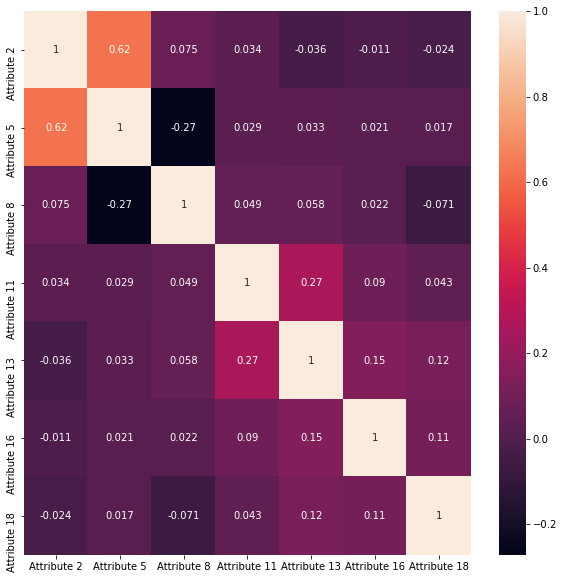

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),annot=True)
plt.show()

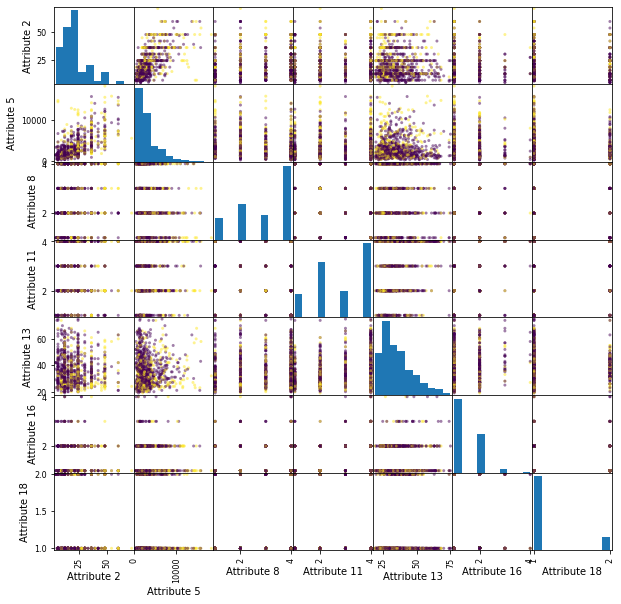

In [13]:
_ = pd.plotting.scatter_matrix(X,c=y,figsize=[10,10])

# One hot encoding

In [14]:
X = pd.get_dummies(X,drop_first=True)

In [15]:
X.head()

,Attribute 2,Attribute 5,Attribute 8,Attribute 11,Attribute 13,Attribute 16,Attribute 18,Attribute 1_A12,Attribute 1_A13,Attribute 1_A14,...,Attribute 12_A124,Attribute 14_A142,Attribute 14_A143,Attribute 15_A152,Attribute 15_A153,Attribute 17_A172,Attribute 17_A173,Attribute 17_A174,Attribute 19_A192,Attribute 20_A202
0,6,1169,4,4,67,2,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,0,0,1,...,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,0,0,0,...,1,0,1,0,1,0,1,0,0,0


# Train test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Function to calculate misclassification cost based on cost matrix

In [17]:
def misclassification_cost(confusion_matrix):
    cost_matrix = np.array([[0,1],[5,0]])
    cost = np.sum(confusion_matrix*cost_matrix)
    return cost;

# Setting 1:Random Forest with default parameters

In [59]:
pipe = Pipeline([('rf_classifier',RandomForestClassifier(random_state = 1))])

grid_param = [{}]
gridsearch = GridSearchCV(pipe, grid_param, cv=10, verbose=3,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [60]:
gridsearch.best_estimator_

Pipeline(steps=[('rf_classifier', RandomForestClassifier(random_state=1))])

In [61]:
predicted_proba = best_model.predict_proba(X_test)

In [62]:
best_model.score(X_test,y_test)

0.76

In [63]:
y_pred = best_model.predict(X_test)

In [64]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("Misclassification Cost:",misclassification_cost(metrics.confusion_matrix(y_test,y_pred)))

Accuracy: 0.76
F1 Score: 0.8451612903225807
Misclassification Cost: 200


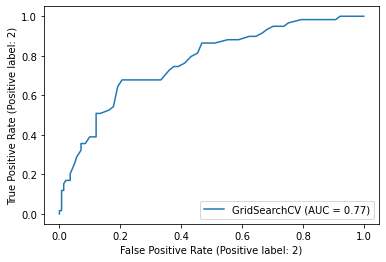

In [65]:
metrics.plot_roc_curve(best_model,X_test, y_test)
plt.show()

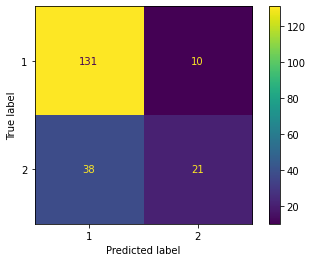

In [66]:
metrics.plot_confusion_matrix(best_model,X_test, y_test)
plt.show()

### Threshold analysis

In [67]:
thresholds = np.arange(0.1, 1.0, 0.01)
predicted_proba = best_model.predict_proba(X_test)

accuracy = []
f1_scores = []
misclass_cost = []

# For each threshold value find  accuracy,f1_scores and misclassification cost

for threshold in thresholds:
    y_pred_bool = (predicted_proba[:,0] >= threshold)
    y_pred = []
    for i in y_pred_bool:
        if(i==True):
            y_pred.append(1)
        else:
            y_pred.append(2)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    f1_scores.append(metrics.f1_score(y_test, y_pred))
    misclass_cost.append(misclassification_cost(metrics.confusion_matrix(y_test,y_pred)))

In [68]:
print("\nThresholds:",thresholds)
print("\nAccuracy:",accuracy)
print("\nF1 scores:",f1_scores)
print("\nMisclassification Cost:",misclass_cost)


Thresholds: [0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23
 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37
 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51
 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65
 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79
 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93
 0.94 0.95 0.96 0.97 0.98 0.99]

Accuracy: [0.705, 0.705, 0.705, 0.705, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.705, 0.705, 0.705, 0.705, 0.71, 0.715, 0.715, 0.725, 0.735, 0.73, 0.735, 0.735, 0.74, 0.74, 0.74, 0.74, 0.735, 0.73, 0.73, 0.73, 0.73, 0.735, 0.74, 0.745, 0.75, 0.75, 0.75, 0.76, 0.75, 0.75, 0.735, 0.745, 0.75, 0.76, 0.77, 0.77, 0.76, 0.745, 0.74, 0.76, 0.76, 0.76, 0.76, 0.75, 0.735, 0.7, 0.67, 0.665, 0.66, 0.65, 0.64, 0.635, 0.625, 0.63, 0.62, 0.6, 0.575, 0.56, 0.55, 0.53, 0.515, 0.505, 0.5, 0.49, 0.465, 0.46, 0.435, 0.42, 0.41,

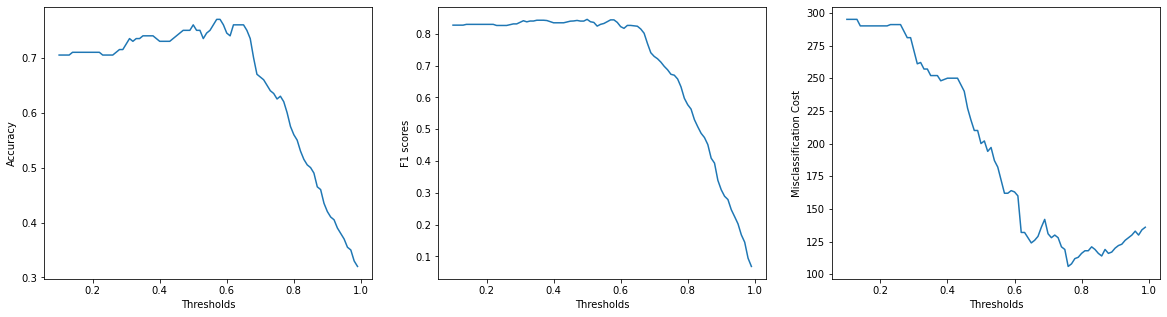

In [69]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
plt.plot(thresholds,accuracy)
plt.xlabel("Thresholds")
plt.ylabel("Accuracy")

plt.subplot(1, 3, 2)
plt.plot(thresholds,f1_scores)
plt.xlabel("Thresholds")
plt.ylabel("F1 scores")

plt.subplot(1, 3, 3)
plt.plot(thresholds,misclass_cost)
plt.xlabel("Thresholds")
plt.ylabel("Misclassification Cost")
plt.show()

plt.show()


# Setting 2:Scaling and PCA then Random Forest with default parameters

In [29]:
pipe = Pipeline([('scalar',StandardScaler()),
                     ('pca',PCA(n_components=40)),
                     ('rf_classifier',RandomForestClassifier(random_state = 1))])

grid_param = [{}]
gridsearch = GridSearchCV(pipe, grid_param, cv=10, verbose=3,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [30]:
gridsearch.best_estimator_

Pipeline(steps=[('scalar', StandardScaler()), ('pca', PCA(n_components=40)),
                ('rf_classifier', RandomForestClassifier(random_state=1))])

In [31]:
best_model.score(X_test,y_test)

0.73

In [32]:
y_pred = best_model.predict(X_test)

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("Misclassification Cost:",misclassification_cost(metrics.confusion_matrix(y_test,y_pred)))

Accuracy: 0.73
F1 Score: 0.8301886792452831
Misclassification Cost: 234


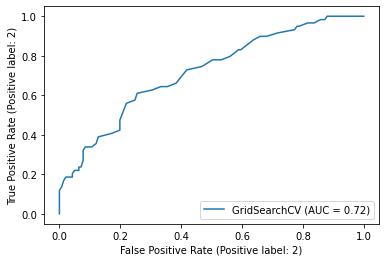

In [34]:
metrics.plot_roc_curve(best_model,X_test, y_test)
plt.show()

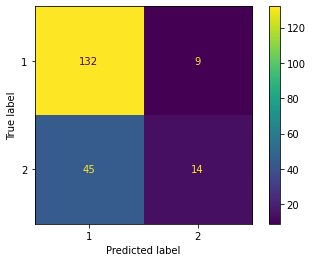

In [35]:
metrics.plot_confusion_matrix(best_model,X_test, y_test)
plt.show()

## Threshold Analysis

In [36]:
thresholds = np.arange(0.1, 1.0, 0.01)
predicted_proba = best_model.predict_proba(X_test)

accuracy = []
f1_scores = []
misclass_cost = []

# For each threshold value find  accuracy,f1_scores and misclassification cost

for threshold in thresholds:
    y_pred_bool = (predicted_proba[:,0] >= threshold)
    y_pred = []
    for i in y_pred_bool:
        if(i==True):
            y_pred.append(1)
        else:
            y_pred.append(2)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    f1_scores.append(metrics.f1_score(y_test, y_pred))
    misclass_cost.append(misclassification_cost(metrics.confusion_matrix(y_test,y_pred)))

In [37]:
print("\nThresholds:",thresholds)
print("\nAccuracy:",accuracy)
print("\nF1 scores:",f1_scores)
print("\nMisclassification Cost:",misclass_cost)


Thresholds: [0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23
 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37
 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51
 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65
 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79
 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93
 0.94 0.95 0.96 0.97 0.98 0.99]

Accuracy: [0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.71, 0.71, 0.71, 0.715, 0.72, 0.725, 0.73, 0.73, 0.73, 0.74, 0.74, 0.745, 0.745, 0.74, 0.73, 0.735, 0.735, 0.725, 0.73, 0.725, 0.73, 0.745, 0.745, 0.74, 0.73, 0.73, 0.73, 0.725, 0.73, 0.705, 0.69, 0.705, 0.715, 0.7, 0.705, 0.675, 0.66, 0.645, 0.63, 0.625, 0.595, 0.58, 0.56, 0.545, 0.535, 0.53, 0.515, 0.505, 0.49, 0.47, 0.435, 0.435, 0.43, 0.415, 0.4, 0.39, 0.3

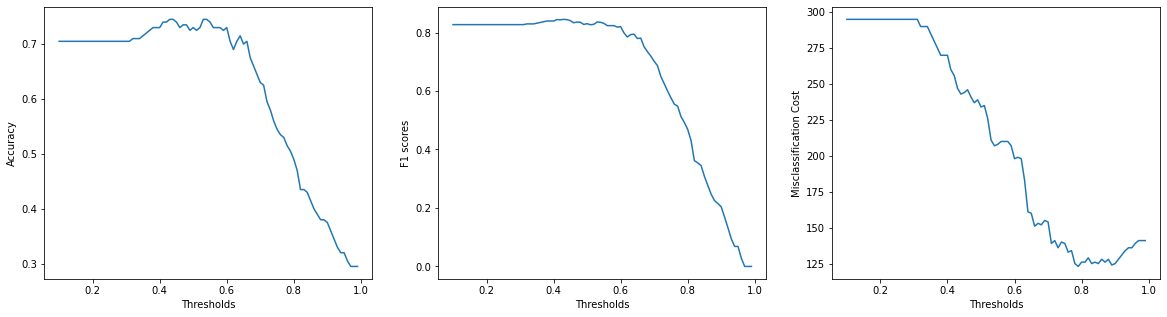

In [38]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
plt.plot(thresholds,accuracy)
plt.xlabel("Thresholds")
plt.ylabel("Accuracy")

plt.subplot(1, 3, 2)
plt.plot(thresholds,f1_scores)
plt.xlabel("Thresholds")
plt.ylabel("F1 scores")

plt.subplot(1, 3, 3)
plt.plot(thresholds,misclass_cost)
plt.xlabel("Thresholds")
plt.ylabel("Misclassification Cost")
plt.show()

plt.show()

------------------------------------------

# Setting 3:Hyperparameter tuning With Random forest

In [2]:
# Create a pipeline
pipe = Pipeline([('classifier',RandomForestClassifier(random_state = 1))])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [{"classifier__n_estimators": [1,5,10,20,50,100],
               "classifier__criterion": ['gini', 'entropy'],
               "classifier__max_depth":[1,2,5,10,20,None],
               "classifier__min_samples_leaf":[1,2,5,10]}]

# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=10, verbose=3,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

NameError: name 'Pipeline' is not defined

In [40]:
gridsearch.best_estimator_

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=2,
                                        random_state=1))])

In [41]:
best_model.score(X_test,y_test)

0.755

In [42]:
y_pred = best_model.predict(X_test)

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("Misclassification Cost:",misclassification_cost(metrics.confusion_matrix(y_test,y_pred)))

Accuracy: 0.755
F1 Score: 0.8434504792332269
Misclassification Cost: 209


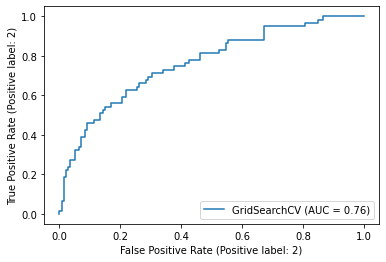

In [44]:
metrics.plot_roc_curve(best_model,X_test, y_test)
plt.show()

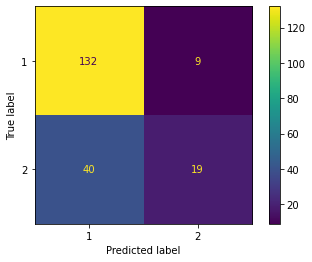

In [45]:
metrics.plot_confusion_matrix(best_model,X_test, y_test)
plt.show()

### Threshold Analysis

In [46]:
thresholds = np.arange(0.1, 1.0, 0.01)
predicted_proba = best_model.predict_proba(X_test)

accuracy = []
f1_scores = []
misclass_cost = []

# For each threshold value find  accuracy,f1_scores and misclassification cost

for threshold in thresholds:
    y_pred_bool = (predicted_proba[:,0] >= threshold)
    y_pred = []
    for i in y_pred_bool:
        if(i==True):
            y_pred.append(1)
        else:
            y_pred.append(2)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    f1_scores.append(metrics.f1_score(y_test, y_pred))
    misclass_cost.append(misclassification_cost(metrics.confusion_matrix(y_test,y_pred)))

In [47]:
print("\nThresholds:",thresholds)
print("\nAccuracy:",accuracy)
print("\nF1 scores:",f1_scores)
print("\nMisclassification Cost:",misclass_cost)


Thresholds: [0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23
 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37
 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51
 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65
 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79
 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93
 0.94 0.95 0.96 0.97 0.98 0.99]

Accuracy: [0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.71, 0.71, 0.71, 0.71, 0.71, 0.705, 0.71, 0.71, 0.71, 0.71, 0.715, 0.715, 0.715, 0.715, 0.72, 0.725, 0.73, 0.735, 0.735, 0.745, 0.745, 0.755, 0.75, 0.755, 0.75, 0.75, 0.76, 0.755, 0.76, 0.755, 0.765, 0.765, 0.765, 0.765, 0.75, 0.76, 0.76, 0.76, 0.755, 0.75, 0.74, 0.73, 0.73, 0.71, 0.7, 0.7, 0.685, 0.67, 0.655, 0.64, 0.63, 0.62, 0.615, 0.6, 0.58, 0.575, 0.565, 0.57, 0.535, 0.495, 0.505, 0.465, 0.45, 0.425, 0.42, 0.415, 0.4

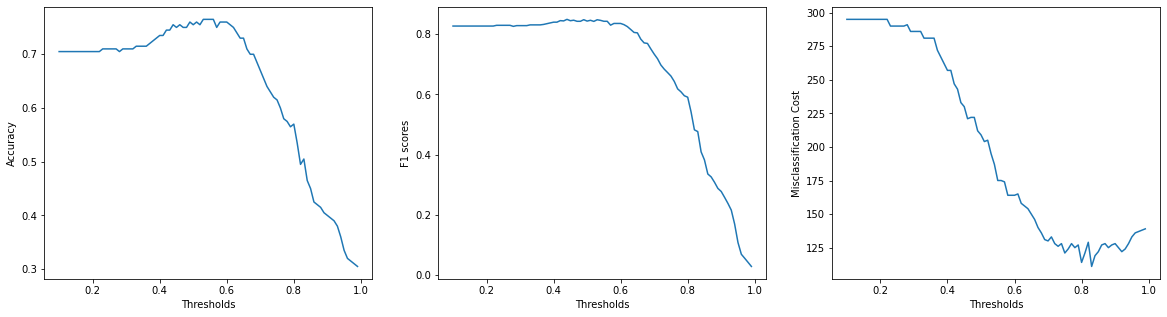

In [48]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
plt.plot(thresholds,accuracy)
plt.xlabel("Thresholds")
plt.ylabel("Accuracy")

plt.subplot(1, 3, 2)
plt.plot(thresholds,f1_scores)
plt.xlabel("Thresholds")
plt.ylabel("F1 scores")

plt.subplot(1, 3, 3)
plt.plot(thresholds,misclass_cost)
plt.xlabel("Thresholds")
plt.ylabel("Misclassification Cost")
plt.show()

plt.show()

# Setting 4:Scaling and PCA then Hyperparameter tuning with Random Forest

In [72]:
# Create a pipeline
pipe = Pipeline([('scalar',StandardScaler()),
                     ('pca',PCA(n_components=40)),
                     ('classifier',RandomForestClassifier(random_state = 1))])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [{"classifier__n_estimators": [1,5,10,20,50,100],
               "classifier__criterion": ['gini', 'entropy'],
               "classifier__max_depth":[1,2,5,10,20,None],
               "classifier__min_samples_leaf":[1,2,5,10]}]

# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=10, verbose=3,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


In [87]:
gridsearch.best_estimator_

Pipeline(steps=[('scalar', StandardScaler()), ('pca', PCA(n_components=40)),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=10,
                                        min_samples_leaf=5, n_estimators=50,
                                        random_state=1))])

In [88]:
best_model.score(X_test,y_test)

0.775

In [89]:
y_pred = best_model.predict(X_test)

In [90]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("Misclassification Cost:",misclassification_cost(metrics.confusion_matrix(y_test,y_pred)))

Accuracy: 0.775
F1 Score: 0.8615384615384616
Misclassification Cost: 221


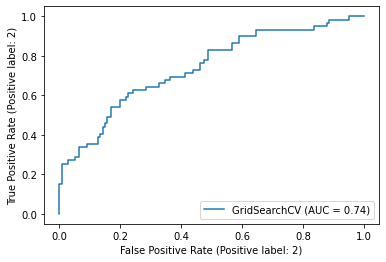

In [91]:
metrics.plot_roc_curve(best_model,X_test, y_test)
plt.show()

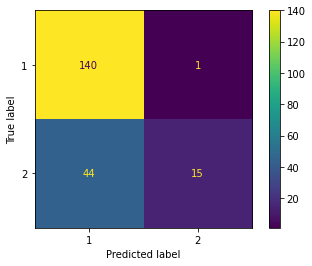

In [92]:
metrics.plot_confusion_matrix(best_model,X_test, y_test)
plt.show()

### Threshold Analysis

In [93]:
thresholds = np.arange(0.1, 1.0, 0.01)
predicted_proba = best_model.predict_proba(X_test)

accuracy = []
f1_scores = []
misclass_cost = []

# For each threshold value find  accuracy,f1_scores and misclassification cost

for threshold in thresholds:
    y_pred_bool = (predicted_proba[:,0] >= threshold)
    y_pred = []
    for i in y_pred_bool:
        if(i==True):
            y_pred.append(1)
        else:
            y_pred.append(2)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    f1_scores.append(metrics.f1_score(y_test, y_pred))
    misclass_cost.append(misclassification_cost(metrics.confusion_matrix(y_test,y_pred)))

In [94]:
print("\nThresholds:",thresholds)
print("\nAccuracy:",accuracy)
print("\nF1 scores:",f1_scores)
print("\nMisclassification Cost:",misclass_cost)


Thresholds: [0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23
 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37
 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51
 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65
 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79
 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93
 0.94 0.95 0.96 0.97 0.98 0.99]

Accuracy: [0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.71, 0.71, 0.71, 0.71, 0.715, 0.715, 0.72, 0.73, 0.73, 0.73, 0.74, 0.745, 0.75, 0.75, 0.75, 0.75, 0.755, 0.755, 0.775, 0.765, 0.76, 0.755, 0.755, 0.745, 0.76, 0.745, 0.74, 0.725, 0.73, 0.73, 0.735, 0.74, 0.735, 0.73, 0.725, 0.72, 0.71, 0.68, 0.655, 0.645, 0.625, 0.6, 0.595, 0.585, 0.55, 0.55, 0.54, 0.515, 0.5, 0.475, 0.465, 0.42, 0.4, 0.39, 0.375, 0.37, 0.355,

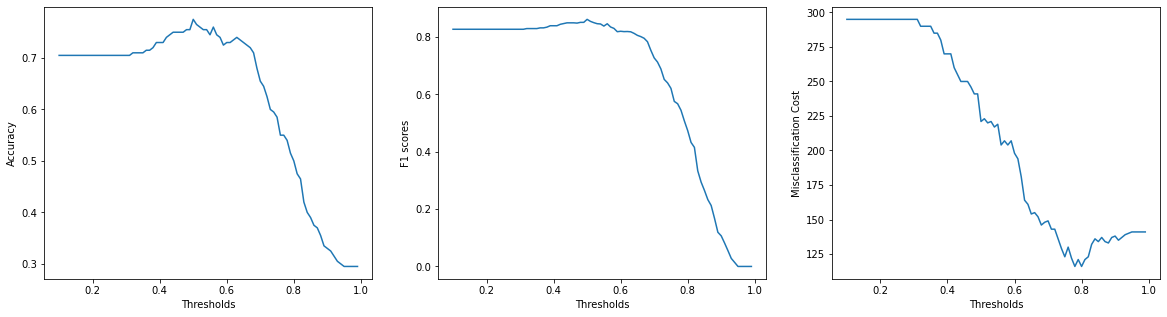

In [81]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
plt.plot(thresholds,accuracy)
plt.xlabel("Thresholds")
plt.ylabel("Accuracy")

plt.subplot(1, 3, 2)
plt.plot(thresholds,f1_scores)
plt.xlabel("Thresholds")
plt.ylabel("F1 scores")

plt.subplot(1, 3, 3)
plt.plot(thresholds,misclass_cost)
plt.xlabel("Thresholds")
plt.ylabel("Misclassification Cost")
plt.show()

plt.show()

# We have chosen setting 4 as it has highest accuracy and f1 score among the four settings

### Selecting a threshold value from Setting 4

In [110]:
i=55
print("\nThreshold:",thresholds[i])
print("\nAccuracy:",accuracy[i])
print("\nF1 score:",f1_scores[i])
print("\nMisclassification Cost:",misclass_cost[i])


Threshold: 0.6499999999999997

Accuracy: 0.73

F1 score: 0.8057553956834532

Misclassification Cost: 154
